<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220623_ML11_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer  # 특정 컬럼(들)만 변환할 때 사용
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  # 선형회귀식 + logistic함수 → 분류
from sklearn.metrics import confusion_matrix, classification_report

# Penguins dataset

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
type(penguins) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


DataFrame에서 NA가 포함된 행들은 모두 삭제.

In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# 데이터 탐색

## 카테고리 타입 변수 시각화

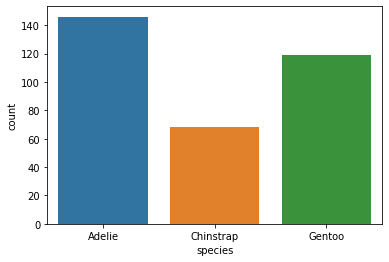

In [ ]:
sns.countplot(data=penguins, x='species')
plt.show()

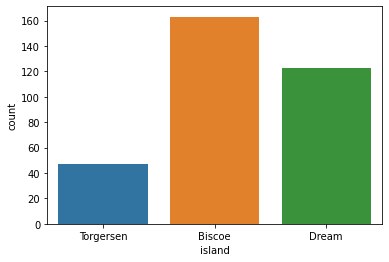

In [ ]:
sns.countplot(data=penguins, x='island')
plt.show()

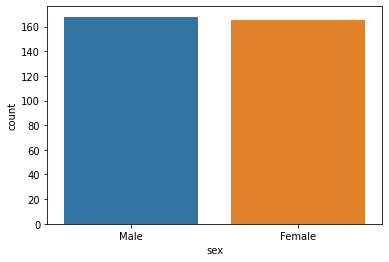

In [ ]:
sns.countplot(data=penguins, x='sex')
plt.show()

## 연속형 변수 시각화

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

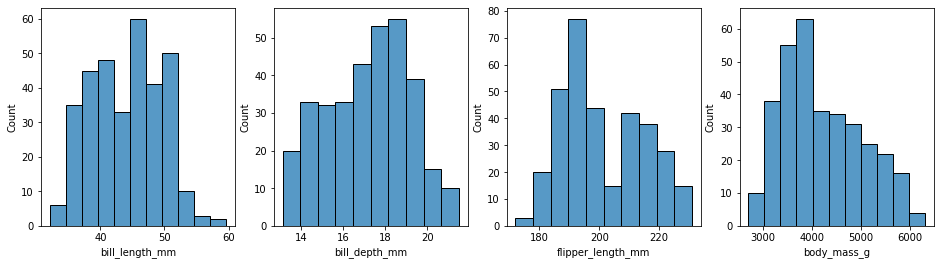

In [ ]:
# 히스토그램을 그릴 4개의 변수 이름
col_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, ax = plt.subplots(ncols=4, figsize=(16, 4))
for i, x in enumerate(col_names):
    sns.histplot(data=penguins, x=x, ax=ax[i])

plt.show()

상관 관계 시각화

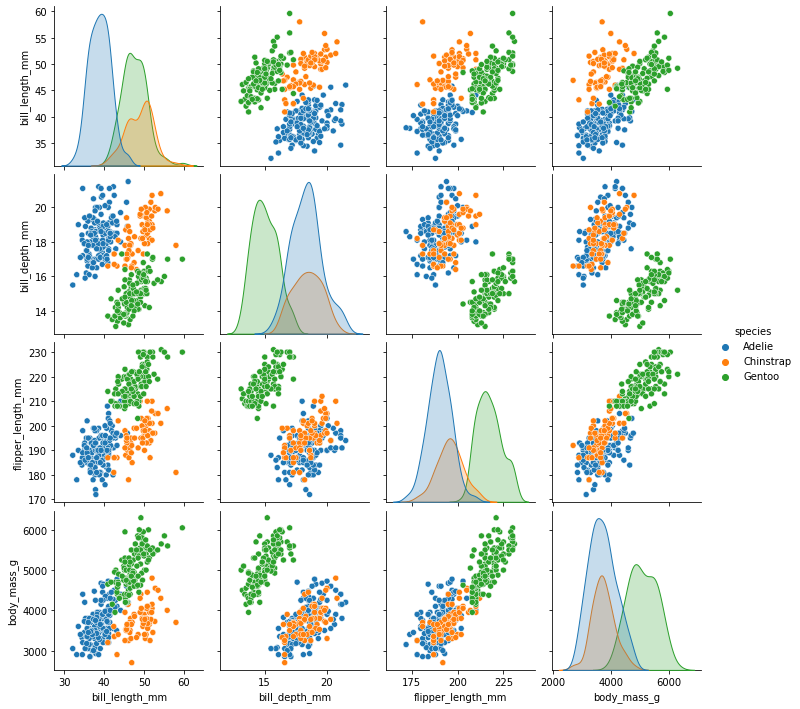

In [ ]:
sns.pairplot(data=penguins, hue='species')
plt.show()

## DataFrame을 data와 target으로 분리

In [ ]:
target = penguins['species']
data = penguins.iloc[:, 1:]

In [ ]:
target # 종속변수(y)

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [ ]:
data # 독립변수(X)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


# LabelEncoder

타겟 배열(1차원 배열)의 클래스들을 숫자(레이블)로 변환.

(n_samples,) → (n_samples,)

In [ ]:
label_enc = LabelEncoder()

In [ ]:
result = label_enc.fit_transform(target)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
label_enc.classes_ # 레이블로 변환된 클래스 이름들

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# OrdinalEncoder

카테고리 타입 특성들(컬럼들)을 정수들의 배열로 변환.

(n_samples, features) → (n_samples, features)

In [ ]:
ordinal_enc = OrdinalEncoder()

In [ ]:
result = ordinal_enc.fit_transform(data[['island']])

In [ ]:
result.shape # (333, 1)

(333, 1)

In [ ]:
result[:5]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [ ]:
result[-5:]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]

In [ ]:
result = ordinal_enc.fit_transform(data[['island', 'sex']])

In [ ]:
ordinal_enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

# OneHotEncoder

(n_samples, features) → (n_samples, n_encoded_features)

In [ ]:
onehot_enc = OneHotEncoder()

In [ ]:
result = onehot_enc.fit_transform(data[['island']])

In [ ]:
onehot_enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]

In [ ]:
result.shape

(333, 3)

In [ ]:
# sparse matrix : 대부분의 원소가 0이고, 일부의 원소들만 0이 아닌 원소들로 채워진 배열.
# result는 ndarray가 아니라 sparse matrix
# ⇒ ndarray로 변환하기 위해서 toarray() 메서드를 호출
result.toarray()[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
result.toarray()[-5:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# island와 sex을 동시에 one-hot encoding
result = onehot_enc.fit_transform(data[['island', 'sex']])

In [ ]:
onehot_enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
result.toarray()[:5]

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.]])

# ColumnTransformer

In [ ]:
data.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# 카테고리 타입의 컬럼 이름들 → Encoder를 적용
cat_cols = ['island', 'sex']
# 숫자 타입의 컬럼 이름들 → Scaler를 적용
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
# ColumnTransformer 생성 : (이름, 변환기, 변환기를 적용할 컬럼 리스트)
col_transformer = ColumnTransformer(
    [('enc', OrdinalEncoder(), cat_cols),
     ('scaler', StandardScaler(), num_cols)]
)

In [ ]:
result = col_transformer.fit_transform(data)
result

array([[ 2.        ,  1.        , -0.89604189,  0.7807321 , -1.42675157,
        -0.56847478],
       [ 2.        ,  0.        , -0.82278787,  0.11958397, -1.06947358,
        -0.50628618],
       [ 2.        ,  0.        , -0.67627982,  0.42472926, -0.42637319,
        -1.1903608 ],
       ...,
       [ 0.        ,  1.        ,  1.17338426, -0.74499437,  1.50292796,
         1.91906927],
       [ 0.        ,  0.        ,  0.22108196, -1.20271231,  0.78837197,
         1.23499466],
       [ 0.        ,  1.        ,  1.08181673, -0.54156417,  0.85982757,
         1.48374906]])

In [ ]:
# ColumnTransformer에서는 named_transformers_ 속성을 사용해서
# 각각의 컬럼에 적용하는 변환기들을 찾을 수 있음.
col_transformer.named_transformers_['enc'].categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
col_transformer.named_transformers_['scaler'].mean_

array([  43.99279279,   17.16486486,  200.96696697, 4207.05705706])

In [ ]:
col_transformer.named_transformers_['scaler'].var_

array([2.98165246e+01, 3.86624300e+00, 1.95851762e+02, 6.46425423e+05])

In [ ]:
col_transformer = ColumnTransformer(
    [('enc', OneHotEncoder(), cat_cols),
     ('scaler', StandardScaler(), num_cols)]
)

In [ ]:
result = col_transformer.fit_transform(data)
result.shape

(333, 9)

In [ ]:
result[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        -0.89604189,  0.7807321 , -1.42675157, -0.56847478]])

# Pipeline

* data, target을 훈련/테스트 셋으로 분리
* 훈련 target을 LabelEncoder를 적용해서 인코딩.
* ColumnTransformer 생성 :
    * 카테고리 타입 변수들(island, sex)에는 OrdinalEncoder 또는 OneHotEncoder를 적용
    * 숫자 타입 변수들에는 StandardScaler를 적용해서 스케일링.
* Estimator(ML 모델) 생성
* ColumnTransformer와 Estimator를 Pipeline으로 연결
* Pipeline 훈련, 예측, 평가

In [ ]:
# target의 클래스들을 Label encoding하기 위해서
label_enc = LabelEncoder()

In [ ]:
y = label_enc.fit_transform(target)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([146,  68, 119]))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, y, test_size=0.2,
                                          random_state=42, stratify=y)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((266, 6), (67, 6), (266,), (67,))

In [ ]:
X_tr.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
268,Biscoe,44.9,13.3,213.0,5100.0,Female
205,Dream,50.7,19.7,203.0,4050.0,Male
337,Biscoe,48.8,16.2,222.0,6000.0,Male
123,Torgersen,41.4,18.5,202.0,3875.0,Male
38,Dream,37.6,19.3,181.0,3300.0,Female


In [ ]:
# ColumnTransformer 생성
col_transformer = ColumnTransformer(
    [('enc', OneHotEncoder(), cat_cols),
     ('scaler', StandardScaler(), num_cols)]
)

In [ ]:
# ColumnTransformer와 LogisticRegression을 Pipeline으로 연결
model = Pipeline([('trans', col_transformer),
                  ('clf', LogisticRegression())])

In [ ]:
# ML 모델 훈련(훈련 데이터로 학습)
model.fit(X_tr, y_tr)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('enc', OneHotEncoder(),
                                                  ['island', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])])),
                ('clf', LogisticRegression())])

In [ ]:
# 카테고리 이름들
model['trans'].named_transformers_['enc'].categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
# 훈련 셋 숫자 타입 변수들의 평균
model['trans'].named_transformers_['scaler'].mean_

array([  43.98421053,   17.22593985,  201.30075188, 4224.43609023])

In [ ]:
# 훈련 셋에서 LogisticRegression이 찾은 계수들
model['clf'].coef_ # shape : [3, 9] ⇒ (n_classes, n_features)

array([[ 0.03338347, -0.56954727,  0.53617349, -0.59148301,  0.59149271,
        -2.29616571,  0.93106112, -0.57173955, -0.16300622],
       [-0.68343773,  1.08247482, -0.39904319,  0.47565912, -0.47566522,
         1.94447847,  0.33470986, -0.41380958, -0.82207583],
       [ 0.65005426, -0.51292755, -0.1371303 ,  0.11582389, -0.11582749,
         0.35168724, -1.26577098,  0.98554913,  0.98508205]])

In [ ]:
# 훈련 셋 예측값
tr_pred = model.predict(X_tr)
tr_pred[:10]

array([2, 1, 2, 0, 0, 2, 2, 0, 0, 2])

In [ ]:
y_tr[:10]

array([2, 1, 2, 0, 0, 2, 2, 0, 0, 2])

In [ ]:
confusion_matrix(y_tr, tr_pred)

array([[117,   0,   0],
       [  1,  53,   0],
       [  0,   0,  95]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=label_enc.classes_))

              precision    recall  f1-score   support

      Adelie       0.99      1.00      1.00       117
   Chinstrap       1.00      0.98      0.99        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      0.99      1.00       266
weighted avg       1.00      1.00      1.00       266



In [ ]:
# 테스트 셋 예측값
te_pred = model.predict(X_te)
te_pred[:10]

array([2, 1, 0, 2, 2, 2, 1, 0, 0, 2])

In [ ]:
y_te[:10] # 테스트 셋 실젯값

array([2, 1, 0, 2, 2, 2, 1, 0, 0, 2])

In [ ]:
confusion_matrix(y_te, te_pred)

array([[28,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 24]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=label_enc.classes_))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

